In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from rdkit.Chem import Fragments

from tdc.single_pred import Tox
data = Tox(name = 'AMES')
split = data.get_split()
df = pd.DataFrame(split['train'])
df

Found local copy...
Loading...
Done!


,Drug_ID,Drug,Y
0,Drug 1,O=[N+]([O-])c1c2c(c3ccc4cccc5ccc1c3c45)CCCC2,1
1,Drug 2,O=c1c2ccccc2c(=O)c2c1ccc1c2[nH]c2c3c(=O)c4cccc...,0
2,Drug 3,[N-]=[N+]=CC(=O)NCC(=O)NN,1
3,Drug 4,[N-]=[N+]=C1C=NC(=O)NC1=O,1
4,Drug 6,CCCCN(CC(O)C1=CC(=[N+]=[N-])C(=O)C=C1)N=O,1
...,...,...,...
5089,Drug 7568,CCC(CCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C)C(C)C,0
5090,Drug 7587,CCCCCCCCCCCCOCCO,0
5091,Drug 7593,CCOP(=S)(CC)Sc1ccccc1,0
5092,Drug 7598,C=C(C)C1CC=C(C)C(OC(C)=O)C1,0


In [ ]:
df.drop(['Drug_ID'], axis=1, inplace=True)
df = df.drop_duplicates()
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5084 entries, 0 to 5093
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Drug    5084 non-null   object
 1   Y       5084 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 119.2+ KB


In [ ]:
from rdkit import Chem 

#Method transforms smiles strings to mol rdkit object
df['molecula'] = df['Drug'].apply(lambda x: Chem.MolFromSmiles(x)) 

In [ ]:
df.head()

,Drug,Y,molecula
0,O=[N+]([O-])c1c2c(c3ccc4cccc5ccc1c3c45)CCCC2,1,<rdkit.Chem.rdchem.Mol object at 0x7f47130d99e0>
1,O=c1c2ccccc2c(=O)c2c1ccc1c2[nH]c2c3c(=O)c4cccc...,0,<rdkit.Chem.rdchem.Mol object at 0x7f47130d9940>
2,[N-]=[N+]=CC(=O)NCC(=O)NN,1,<rdkit.Chem.rdchem.Mol object at 0x7f47130d98f0>
3,[N-]=[N+]=C1C=NC(=O)NC1=O,1,<rdkit.Chem.rdchem.Mol object at 0x7f47130d9990>
4,CCCCN(CC(O)C1=CC(=[N+]=[N-])C(=O)C=C1)N=O,1,<rdkit.Chem.rdchem.Mol object at 0x7f47130d9a30>


In [ ]:
df['num_of_atoms'] = df['molecula'].apply(lambda x: x.GetNumAtoms())
df['num_of_heavy_atoms'] = df['molecula'].apply(lambda x: x.GetNumHeavyAtoms())
df.head()

,Drug,Y,molecula,num_of_atoms,num_of_heavy_atoms
0,O=[N+]([O-])c1c2c(c3ccc4cccc5ccc1c3c45)CCCC2,1,<rdkit.Chem.rdchem.Mol object at 0x7f47130d99e0>,23,23
1,O=c1c2ccccc2c(=O)c2c1ccc1c2[nH]c2c3c(=O)c4cccc...,0,<rdkit.Chem.rdchem.Mol object at 0x7f47130d9940>,50,50
2,[N-]=[N+]=CC(=O)NCC(=O)NN,1,<rdkit.Chem.rdchem.Mol object at 0x7f47130d98f0>,11,11
3,[N-]=[N+]=C1C=NC(=O)NC1=O,1,<rdkit.Chem.rdchem.Mol object at 0x7f47130d9990>,10,10
4,CCCCN(CC(O)C1=CC(=[N+]=[N-])C(=O)C=C1)N=O,1,<rdkit.Chem.rdchem.Mol object at 0x7f47130d9a30>,19,19


In [ ]:
def number_of_atoms(atom_list, df):
    for i in atom_list:
        df['num_of_{}_atoms'.format(i)] = df['molecula'].apply(lambda x: len(x.GetSubstructMatches(Chem.MolFromSmiles(i))))

number_of_atoms(['C','O', 'N', 'Cl', 'Br', 'P'], df)

In [ ]:
df.head()

,Drug,Y,molecula,num_of_atoms,num_of_heavy_atoms,num_of_C_atoms,num_of_O_atoms,num_of_N_atoms,num_of_Cl_atoms,num_of_Br_atoms,num_of_P_atoms
0,O=[N+]([O-])c1c2c(c3ccc4cccc5ccc1c3c45)CCCC2,1,<rdkit.Chem.rdchem.Mol object at 0x7f47130d99e0>,23,23,20,2,1,0,0,0
1,O=c1c2ccccc2c(=O)c2c1ccc1c2[nH]c2c3c(=O)c4cccc...,0,<rdkit.Chem.rdchem.Mol object at 0x7f47130d9940>,50,50,42,6,2,0,0,0
2,[N-]=[N+]=CC(=O)NCC(=O)NN,1,<rdkit.Chem.rdchem.Mol object at 0x7f47130d98f0>,11,11,4,2,5,0,0,0
3,[N-]=[N+]=C1C=NC(=O)NC1=O,1,<rdkit.Chem.rdchem.Mol object at 0x7f47130d9990>,10,10,4,2,4,0,0,0
4,CCCCN(CC(O)C1=CC(=[N+]=[N-])C(=O)C=C1)N=O,1,<rdkit.Chem.rdchem.Mol object at 0x7f47130d9a30>,19,19,12,3,4,0,0,0


In [ ]:
from rdkit.Chem import Descriptors
df['mol_weight'] = df['molecula'].apply(lambda x: Descriptors.MolWt(x))
df.head()

,Drug,Y,molecula,num_of_atoms,num_of_heavy_atoms,num_of_C_atoms,num_of_O_atoms,num_of_N_atoms,num_of_Cl_atoms,num_of_Br_atoms,num_of_P_atoms,mol_weight
0,O=[N+]([O-])c1c2c(c3ccc4cccc5ccc1c3c45)CCCC2,1,<rdkit.Chem.rdchem.Mol object at 0x7f47130d99e0>,23,23,20,2,1,0,0,0,301.345
1,O=c1c2ccccc2c(=O)c2c1ccc1c2[nH]c2c3c(=O)c4cccc...,0,<rdkit.Chem.rdchem.Mol object at 0x7f47130d9940>,50,50,42,6,2,0,0,0,646.614
2,[N-]=[N+]=CC(=O)NCC(=O)NN,1,<rdkit.Chem.rdchem.Mol object at 0x7f47130d98f0>,11,11,4,2,5,0,0,0,157.133
3,[N-]=[N+]=C1C=NC(=O)NC1=O,1,<rdkit.Chem.rdchem.Mol object at 0x7f47130d9990>,10,10,4,2,4,0,0,0,138.086
4,CCCCN(CC(O)C1=CC(=[N+]=[N-])C(=O)C=C1)N=O,1,<rdkit.Chem.rdchem.Mol object at 0x7f47130d9a30>,19,19,12,3,4,0,0,0,264.285


<AxesSubplot:>

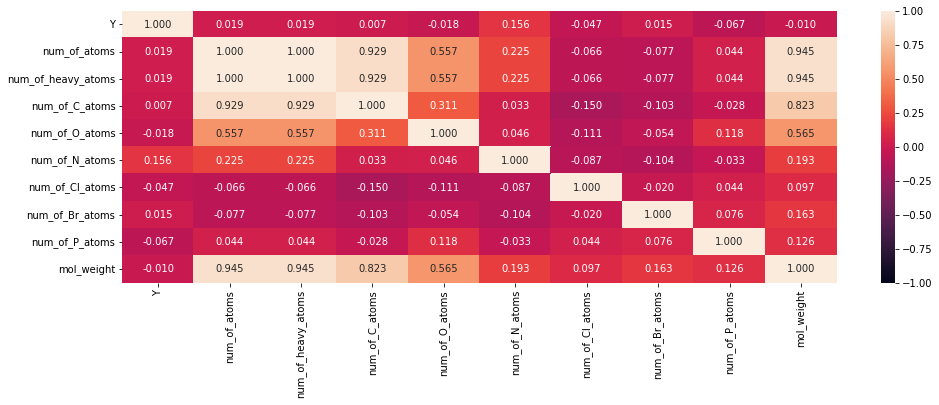

In [9]:
corr = df.corr()
plt.figure(figsize = (16,5))
sns.heatmap(corr, vmax=1, vmin=-1,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True, fmt=".3f")

In [10]:
df['tpsa'] = df['molecula'].apply(lambda x: Descriptors.TPSA(x))
df['mol_w'] = df['molecula'].apply(lambda x: Descriptors.ExactMolWt(x))
df['num_valence_electrons'] = df['molecula'].apply(lambda x: Descriptors.NumValenceElectrons(x))
df['num_heteroatoms'] = df['molecula'].apply(lambda x: Descriptors.NumHeteroatoms(x))

In [11]:
from mol2vec.features import mol2alt_sentence, mol2sentence, MolSentence, DfVec, sentences2vec
from gensim.models import word2vec

# model = word2vec.Word2Vec.load('model_300dim.pkl')
df['sentence'] = df.apply(lambda x: MolSentence(mol2alt_sentence(x['molecula'], 1)), axis=1)
# data['mol2vec'] = [DfVec(x) for x in sentences2vec(data['sentence'], model, unseen='UNK')]
# data['vec'] = data['mol2vec'].vec
df.head()

,Drug,Y,molecula,num_of_atoms,num_of_heavy_atoms,num_of_C_atoms,num_of_O_atoms,num_of_N_atoms,num_of_Cl_atoms,num_of_Br_atoms,num_of_P_atoms,mol_weight,tpsa,mol_w,num_valence_electrons,num_heteroatoms,sentence
0,O=[N+]([O-])c1c2c(c3ccc4cccc5ccc1c3c45)CCCC2,1,"<img data-content=""rdkit/molecule"" src=""data:i...",23,23,20,2,1,0,0,0,301.345,43.14,301.110279,112,3,"(864942730, 2378779377, 848127915, 271903915, ..."
1,O=c1c2ccccc2c(=O)c2c1ccc1c2[nH]c2c3c(=O)c4cccc...,0,"<img data-content=""rdkit/molecule"" src=""data:i...",50,50,42,6,2,0,0,0,646.614,134.00,646.116486,232,8,"(864942730, 10565946, 3217380708, 3631761933, ..."
2,[N-]=[N+]=CC(=O)NCC(=O)NN,1,"<img data-content=""rdkit/molecule"" src=""data:i...",11,11,4,2,5,0,0,0,157.133,120.62,157.059974,60,7,"(847433129, 3386374884, 849271271, 2739538070,..."
3,[N-]=[N+]=C1C=NC(=O)NC1=O,1,"<img data-content=""rdkit/molecule"" src=""data:i...",10,10,4,2,4,0,0,0,138.086,94.93,138.017775,50,6,"(847433129, 3386374884, 849271271, 1777784488,..."
4,CCCCN(CC(O)C1=CC(=[N+]=[N-])C(=O)C=C1)N=O,1,"<img data-content=""rdkit/molecule"" src=""data:i...",19,19,12,3,4,0,0,0,264.285,106.37,264.122240,102,7,"(2246728737, 3542456614, 2245384272, 117312591..."


In [12]:
df['sentence_len'] = df['sentence'].apply(len)
df = df.drop(['sentence', 'Drug'], axis=1)
df.head()

,Y,molecula,num_of_atoms,num_of_heavy_atoms,num_of_C_atoms,num_of_O_atoms,num_of_N_atoms,num_of_Cl_atoms,num_of_Br_atoms,num_of_P_atoms,mol_weight,tpsa,mol_w,num_valence_electrons,num_heteroatoms,sentence_len
0,1,"<img data-content=""rdkit/molecule"" src=""data:i...",23,23,20,2,1,0,0,0,301.345,43.14,301.110279,112,3,46
1,0,"<img data-content=""rdkit/molecule"" src=""data:i...",50,50,42,6,2,0,0,0,646.614,134.00,646.116486,232,8,100
2,1,"<img data-content=""rdkit/molecule"" src=""data:i...",11,11,4,2,5,0,0,0,157.133,120.62,157.059974,60,7,22
3,1,"<img data-content=""rdkit/molecule"" src=""data:i...",10,10,4,2,4,0,0,0,138.086,94.93,138.017775,50,6,20
4,1,"<img data-content=""rdkit/molecule"" src=""data:i...",19,19,12,3,4,0,0,0,264.285,106.37,264.122240,102,7,38


In [13]:
from rdkit.Chem import Crippen
df['clogp']= df['molecula'].apply(lambda x: Crippen.MolLogP(x))
df['clogmr']= df['molecula'].apply(lambda x: Crippen.MolMR(x))
df['fr_benzene'] = df['molecula'].apply(Fragments.fr_benzene)

<AxesSubplot:>

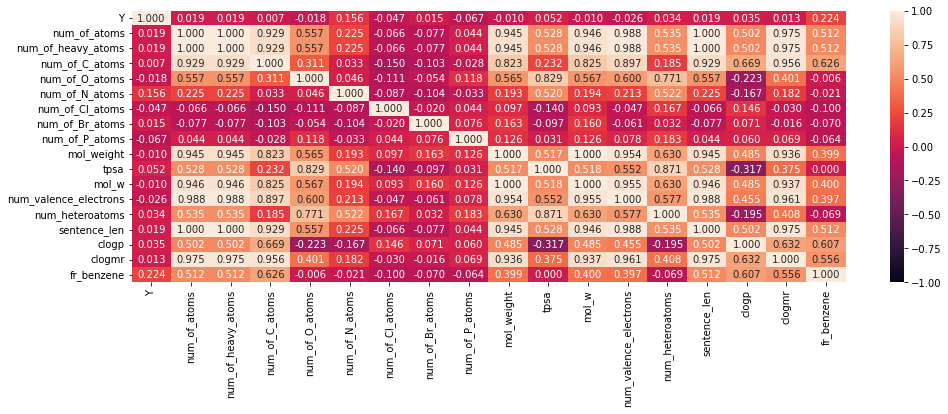

In [14]:
corr = df.corr()
plt.figure(figsize = (16,5))
sns.heatmap(corr, vmax=1, vmin=-1,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True, fmt=".3f")

In [15]:
df.head()

,Y,molecula,num_of_atoms,num_of_heavy_atoms,num_of_C_atoms,num_of_O_atoms,num_of_N_atoms,num_of_Cl_atoms,num_of_Br_atoms,num_of_P_atoms,mol_weight,tpsa,mol_w,num_valence_electrons,num_heteroatoms,sentence_len,clogp,clogmr,fr_benzene
0,1,"<img data-content=""rdkit/molecule"" src=""data:i...",23,23,20,2,1,0,0,0,301.345,43.14,301.110279,112,3,46,5.3710,93.4424,4
1,0,"<img data-content=""rdkit/molecule"" src=""data:i...",50,50,42,6,2,0,0,0,646.614,134.00,646.116486,232,8,100,6.3494,201.3814,9
2,1,"<img data-content=""rdkit/molecule"" src=""data:i...",11,11,4,2,5,0,0,0,157.133,120.62,157.059974,60,7,22,-2.6069,35.0232,0
3,1,"<img data-content=""rdkit/molecule"" src=""data:i...",10,10,4,2,4,0,0,0,138.086,94.93,138.017775,50,6,20,-1.0222,30.6571,0
4,1,"<img data-content=""rdkit/molecule"" src=""data:i...",19,19,12,3,4,0,0,0,264.285,106.37,264.122240,102,7,38,0.8669,69.1392,0


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC

df.drop(['molecula'], axis=1, inplace=True)
RANDOM_STATE = np.random.RandomState(1000)
TARGET = 'Y'
def get_features(df, scaler = None):
    result = df.drop(TARGET, axis=1)
    if scaler is not None:
        result = scaler.transform(result)
    return result

def get_model_and_scaler_with_RMSE(df):
    target = df[TARGET]
    features = get_features(df)
    features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.20, random_state=RANDOM_STATE)
    scaler = StandardScaler()
    scaler.fit(features_train)
    features_train = scaler.transform(features_train)
    features_valid = scaler.transform(features_valid)
    linear_regression = SVC(random_state=RANDOM_STATE, probability=True)
    linear_regression.fit(features_train, target_train)

    predictions_valid = linear_regression.predict_proba(features_valid)[:, 1]
    err = roc_auc_score(target_valid, predictions_valid)
    print(f"ROC AUC модели: {err:.2f}")
    return linear_regression, scaler

model, scaler = get_model_and_scaler_with_RMSE(df)

ROC AUC модели: 0.76


In [17]:
df['pred'] = model.predict(get_features(df, scaler))
df.describe()

,Y,num_of_atoms,num_of_heavy_atoms,num_of_C_atoms,num_of_O_atoms,num_of_N_atoms,num_of_Cl_atoms,num_of_Br_atoms,num_of_P_atoms,mol_weight,tpsa,mol_w,num_valence_electrons,num_heteroatoms,sentence_len,clogp,clogmr,fr_benzene,pred
count,5084.000000,5084.000000,5084.000000,5084.000000,5084.000000,5084.000000,5084.000000,5084.000000,5084.000000,5084.000000,5084.000000,5084.000000,5084.000000,5084.000000,5084.000000,5084.000000,5084.000000,5084.000000,5084.000000
mean,0.540716,16.783242,16.783242,12.433517,2.415814,1.339496,0.277341,0.061959,0.027341,242.893202,55.725553,242.528327,88.321597,4.349725,33.565893,2.499716,65.573406,1.220692,0.539536
std,0.498388,7.759025,7.759025,6.668310,2.247825,1.492985,0.859034,0.397583,0.178083,108.595098,42.607358,108.416117,40.235631,2.922307,15.519193,2.015427,29.643729,1.253630,0.498483
min,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.053000,0.000000,41.026549,14.000000,0.000000,3.000000,-8.161100,0.000000,0.000000,0.000000
25%,0.000000,11.000000,11.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000,165.538000,26.300000,165.078979,60.000000,2.000000,22.000000,1.207050,43.411775,0.000000,0.000000
50%,1.000000,16.000000,16.000000,12.000000,2.000000,1.000000,0.000000,0.000000,0.000000,230.264500,47.405000,229.951738,84.000000,4.000000,32.000000,2.387710,63.053800,1.000000,1.000000
75%,1.000000,21.000000,21.000000,17.000000,4.000000,2.000000,0.000000,0.000000,0.000000,296.319000,75.867500,296.060407,108.000000,6.000000,42.000000,3.736075,83.697000,2.000000,1.000000
max,1.000000,55.000000,55.000000,42.000000,21.000000,10.000000,12.000000,6.000000,3.000000,795.615000,336.430000,795.151183,314.000000,25.000000,110.000000,13.962000,218.348400,9.000000,1.000000


In [18]:
df[['Y', 'pred']].head(100)

,Y,pred
0,1,1
1,0,0
2,1,1
3,1,1
4,1,1
...,...,...
95,1,1
96,0,0
97,0,0
98,0,1


In [19]:
def solve_classification_problem(data, target_label, model):
    target = data[target_label]
    features = get_features(data, target_label)
    features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.30, random_state=np.random.RandomState(10))
    scaler = MinMaxScaler()
    scaler.fit(features_train)
    features_train = scaler.transform(features_train)
    features_valid = scaler.transform(features_valid)
    model.fit(features_train, target_train)

    predictions_valid = model.predict_proba(features_valid)[:, 1]
    err = roc_auc_score(target_valid, predictions_valid)
    print(f"ROC AUC модели: {err:.2f}")
    return model, scaler

In [22]:
from sklearn.tree import DecisionTreeClassifier
criterions = ["gini", "entropy"]
for i in criterions:
    model = DecisionTreeClassifier(criterion = i, random_state=np.random.RandomState(10))
    print(f"{i}")
    solve_classification_problem(df, TARGET, model)

gini


AttributeError: 'str' object has no attribute 'transform'

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5084 entries, 0 to 5093
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Y                      5084 non-null   int64  
 1   num_of_atoms           5084 non-null   int64  
 2   num_of_heavy_atoms     5084 non-null   int64  
 3   num_of_C_atoms         5084 non-null   int64  
 4   num_of_O_atoms         5084 non-null   int64  
 5   num_of_N_atoms         5084 non-null   int64  
 6   num_of_Cl_atoms        5084 non-null   int64  
 7   num_of_Br_atoms        5084 non-null   int64  
 8   num_of_P_atoms         5084 non-null   int64  
 9   mol_weight             5084 non-null   float64
 10  tpsa                   5084 non-null   float64
 11  mol_w                  5084 non-null   float64
 12  num_valence_electrons  5084 non-null   int64  
 13  num_heteroatoms        5084 non-null   int64  
 14  sentence_len           5084 non-null   int64  
 15  clog